##Multi Layer Perceptron for IRIS Flower Classification - Solving a Binary Classification Problem

###Using Keras to Build ANN - MLP

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Deep_Learning/main/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.species.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Scaling dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("X_scaled type is", type(X_scaled))

y_species = df.species

X_scaled_df = pd.DataFrame(X_scaled, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

final_df = pd.concat([X_scaled_df, y_species], axis = 1)

X_scaled type is <class 'numpy.ndarray'>


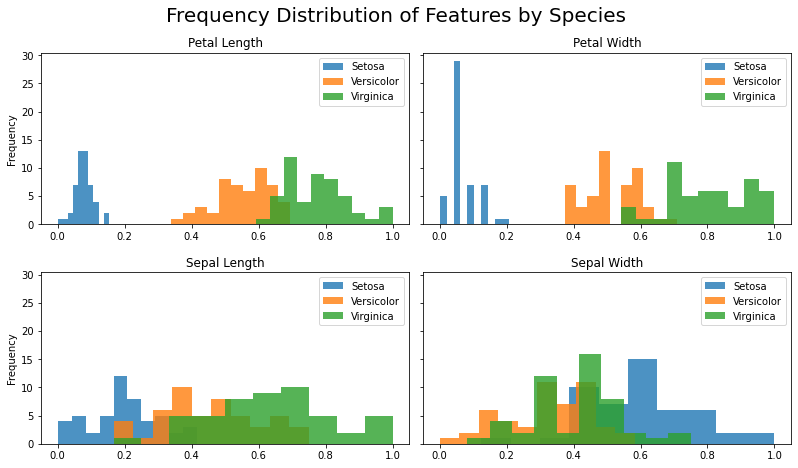

In [8]:
# Notice x-axis on subplots are all the same for all features (0 to 1) after scaling.
fig = plt.figure(figsize=(12,7))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)
ax1 = fig.add_subplot(221)
final_df.groupby('species').petal_length.plot(kind = 'hist', alpha = 0.8, legend = True, title = 'Petal Length')
ax2 = fig.add_subplot(222,sharey=ax1)
final_df.groupby("species").petal_width.plot(kind='hist',alpha=0.8,legend=True,title='Petal Width')
ax3 = fig.add_subplot(223,sharey=ax1)
final_df.groupby("species").sepal_length.plot(kind='hist',alpha=0.8,legend=True,title='Sepal Length')
ax4 = fig.add_subplot(224,sharey=ax1)
final_df.groupby("species").sepal_width.plot(kind='hist',alpha=0.8,legend=True,title='Sepal Width')

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()

Summary Statistcis

In [9]:
final_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

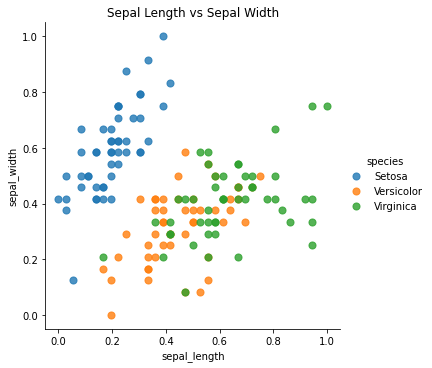

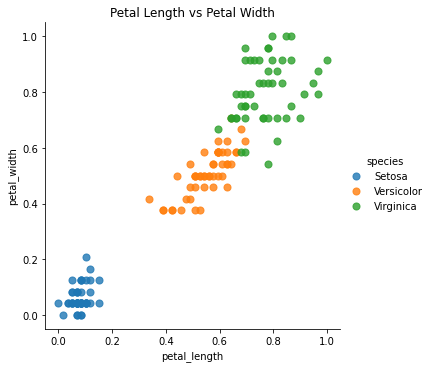

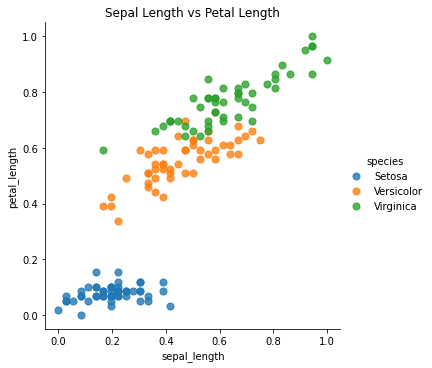

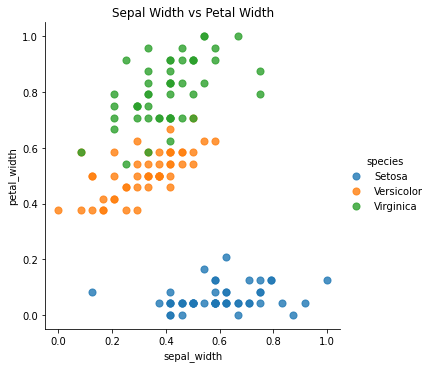

In [10]:
Oimport seaborn as sns
import matplotlib.pyplot as plt

data = final_df
sns.lmplot('sepal_length', 'sepal_width', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal Length vs Sepal Width')

sns.lmplot('petal_length', 'petal_width', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Petal Length vs Petal Width')

sns.lmplot('sepal_length', 'petal_length', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal Length vs Petal Length')

sns.lmplot('sepal_width', 'petal_width', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal Width vs Petal Width')

plt.show()

##Building the MLP Model

In [22]:
final_df.species.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

In [37]:
X = final_df.iloc[:100,:4]
X.head()
y = final_df.iloc[:100,-1]

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###Split Data into Training and Test Set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=101)

In [42]:
print('\n Shape of Training data : ', X_train.shape)
print('\n Shape of Test data : ', X_test.shape)


 Shape of Training data :  (70, 4)

 Shape of Test data :  (30, 4)


In [43]:
print('Labels counts in the original dataset - y:', np.bincount(y))
print('Labels counts in the training data - y_train:', np.bincount(y_train))
print('Labels counts in the test data - y_test:', np.bincount(y_test))

Labels counts in the original dataset - y: [50 50]
Labels counts in the training data - y_train: [35 35]
Labels counts in the test data - y_test: [15 15]


### Standardizing the dataset

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Building the Multilayer Perceptron

In [45]:
from keras.models import Sequential, Model
from keras.layers import Dense

In [66]:
input_dims = 4

## MODEL 1
# Build a simple MLP model - A Binary Classifier with a single output neuron
model = Sequential()
model.add(Dense(5, input_dim=input_dims, activation='sigmoid')) # all four features
model.add(Dense(1, activation='sigmoid')) # Binary classification : output layer with 1 neuron 

# Compile MODEL 1
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


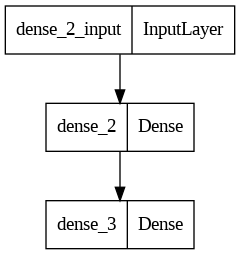

In [68]:
from keras.utils import plot_model
plot_model(model)

Initial Weights and Biases
Keras oficial documentation says....

kernel_initializer="glorot_uniform"

bias_initializer="zeros"

In [69]:
weights = model.get_weights()
weights

[array([[-0.7511713 , -0.23757476, -0.7664015 ,  0.49244046,  0.7159463 ],
        [-0.45595053,  0.77043295, -0.7778614 , -0.39967844, -0.11245519],
        [ 0.5171608 ,  0.5601413 , -0.16968662,  0.01168901,  0.7245699 ],
        [ 0.13286358,  0.3452475 ,  0.66217804, -0.00625587,  0.10861969]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.37083292],
        [-0.50570655],
        [-0.67208123],
        [ 0.6679392 ],
        [-0.7754009 ]], dtype=float32),
 array([0.], dtype=float32)]

Training the Model

In [70]:
history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_test_std, y_test))

Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 0.9015 - accuracy: 0.5000 - val_loss: 0.8852 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.8911 - accuracy: 0.5000 - val_loss: 0.8746 - val_accuracy: 0.5000
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.8806 - accuracy: 0.5000 - val_loss: 0.8644 - val_accuracy: 0.5000
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8700 - accuracy: 0.5000 - val_loss: 0.8546 - val_accuracy: 0.5000
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8604 - accuracy: 0.5000 - val_loss: 0.8450 - val_accuracy: 0.5000
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8507 - accuracy: 0.5000 - val_loss: 0.8355 - val_accuracy: 0.5000
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.8409 - accuracy: 0.5000 - val_loss: 0.8263 - val_accuracy: 0.5000
Epoch 8/100
5/5 [===

Post Training - what are the Weights and Biases

In [71]:
weights = model.get_weights()

In [72]:
weights

[array([[-1.0878633 , -0.63647777, -1.1190956 ,  0.87279606,  0.24849488],
        [-0.04676543,  1.1558973 , -0.34028977, -0.8088316 ,  0.3095757 ],
        [ 0.13066559,  0.13995801, -0.5738691 ,  0.434086  ,  0.27018437],
        [-0.25569016, -0.07722434,  0.25471234,  0.41869545, -0.34295076]],
       dtype=float32),
 array([-0.1676912 , -0.18025722, -0.17908652,  0.15724522, -0.22364296],
       dtype=float32),
 array([[-0.30106604],
        [-0.57735366],
        [-0.58722484],
        [ 1.0992548 ],
        [-0.52355176]], dtype=float32),
 array([0.2092101], dtype=float32)]

Ploting Loss/Accuracy Curve for Training and Validation Data

In [73]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

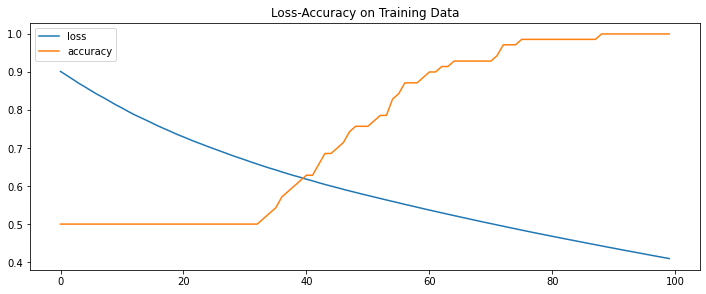

In [74]:
# Plot Loss/Accuracy Profile of the model on Training Data
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Training Data')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()

Test Dataset/Making predictions

In [75]:
# Actual predictions from the ANN are number between 0 and 1 (output of the Sigmoid activation)
pred = model.predict(X_test_std)
print(pred)

1/1 [==============================] - 0s 69ms/step
[[0.68144155]
 [0.67753685]
 [0.29166517]
 [0.35729983]
 [0.2720718 ]
 [0.6457246 ]
 [0.6309964 ]
 [0.27807426]
 [0.31535396]
 [0.2532819 ]
 [0.3304473 ]
 [0.28219086]
 [0.29985517]
 [0.62396634]
 [0.69996   ]
 [0.597586  ]
 [0.624441  ]
 [0.63176084]
 [0.30729926]
 [0.5748519 ]
 [0.30803126]
 [0.30494335]
 [0.29505786]
 [0.6882024 ]
 [0.681705  ]
 [0.6193893 ]
 [0.68570405]
 [0.2692031 ]
 [0.25956482]
 [0.6171059 ]]


Threshold the predictions to get binary output values 0/1

In [76]:
r,c = pred.shape

pred1 = np.zeros(r, dtype = int)

# with sigmoid output activation for binary classification
for i in range(r):
 if pred[i] > 0.5:  # 0.5 is the threshold
  pred1[i] = 1 
 else: 
  pred1[i] = 0 

In [77]:
print('\n Actual class labels : \n', y_test)
print('\n Predictions made by the MLP : \n', pred1)


 Actual class labels : 
 [1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1]

 Predictions made by the MLP : 
 [1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1]


Classification Metrics

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy

In [79]:
acc = accuracy_score(y_test, pred1) 
print(" Accuracy = ", round(acc *100, 2) , '%')

 Accuracy =  100.0 %


Classification Report

In [80]:
print(classification_report (y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix

In [81]:
print(confusion_matrix (y_test, pred1))

[[15  0]
 [ 0 15]]


Evaluate the Model on Test Set

In [82]:
results = model.evaluate(X_test_std, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 59ms/step - loss: 0.3949 - accuracy: 1.0000
Final test set loss: 0.394896
Final test set accuracy: 1.000000


Verifying the Output with Individual Sample

In [106]:
idx = 10 # Index of a data sample present in the Test set

indvidual_test_sample = X_test_std[idx,:].reshape(1, 4)
print('\n Input sample Original : ' , X_test.iloc[10].values.reshape(1,4))
print('\n Input sample Standardize : ' , indvidual_test_sample )


 Input sample Original :  [[0.22222222 0.54166667 0.11864407 0.16666667]]

 Input sample Standardize :  [[-0.57303721  0.39221547 -0.80606545 -0.5162185 ]]


In [107]:
pred = model.predict(indvidual_test_sample)
print('\n Predicted value : ', pred)

if pred > 0.5:
   pred1 = 1
else:
   pred1 = 0

print('\n Predicted label by the model : ', pred1)

print('\n True/Actual Label : ', y_test[idx])

1/1 [==============================] - 0s 27ms/step

 Predicted value :  [[0.3304473]]

 Predicted label by the model :  0

 True/Actual Label :  0


Extracting the Activations of the Neurons from an arbitrary Layer of the MLP

Custom Feature Extractor

In [111]:
# Output activations from the first hidden layer
h1 = model.get_layer(index=0)
#h1.output
# Output activations from the output layer
h2 = model.get_layer(index=1)
#h2.output

# Custom Feature Extractor
mlp_activations_extractor = Model(inputs=model.input, outputs=[h1.output, h2.output])

# Pass an input through the feature extractor and get the activations from the various layers
out = mlp_activations_extractor(indvidual_test_sample)

out

[<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
 array([[0.6139673 , 0.6375805 , 0.6592197 , 0.22685146, 0.4291382 ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.3304473]], dtype=float32)>]

Verify the output of the MLP Step-by-Step

Verify the Output Generated by the MLP - Step-by-Step
Give the new sample as the input to the MLP and compute activations of each neurone.

In [112]:
# Define the Activation Functions
# ReLU
def relu (x):
  return np.maximum(0, x)

# Sigmoid
def sigmoid (x):
  z = 1/(1 + np.exp(-x))
  return z

In [114]:
# Net input to the neurons of the first hidden layer
net_in_h1 = (weights[0]*indvidual_test_sample.T).sum(axis=0) + weights[1]

# Output from the neurons of the first hidden layer after passing through the ReLU activation function
#out_h1 = relu(net_in_h1) # this is the input vector to the next layer 
out_h1 = sigmoid(net_in_h1) # this is the input vector to the next layer 

out_h1 

array([0.61396735, 0.63758054, 0.65921968, 0.22685147, 0.4291382 ])

In [117]:
# Net input to the neuron of the output layer
net_in_out = np.dot(weights[2].reshape(1,5), out_h1.reshape(5,1)) + weights[3]

# Output from the neuron of the output layer after passing through the Sigmoid activation function
out_out = sigmoid(net_in_out) 

out_out

array([[0.33044729]])